In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("Resources/lending_data.csv")
lending_data = pd.read_csv(file_path)
# Review the DataFrame
lending_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data["loan_status"]

# Separate the X variable, the features
X = lending_data.drop(columns=["loan_status"])

In [7]:
# Review the y variable Series
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [5]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [8]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Displaying the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (58152, 7)
X_test shape: (19384, 7)
y_train shape: (58152,)
y_test shape: (19384,)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [10]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [11]:
# Make a prediction using the testing data
y_pred = logistic_regression_model.predict(X_test)
y_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [23]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix


array([[18663,   102],
       [   56,   563]], dtype=int64)

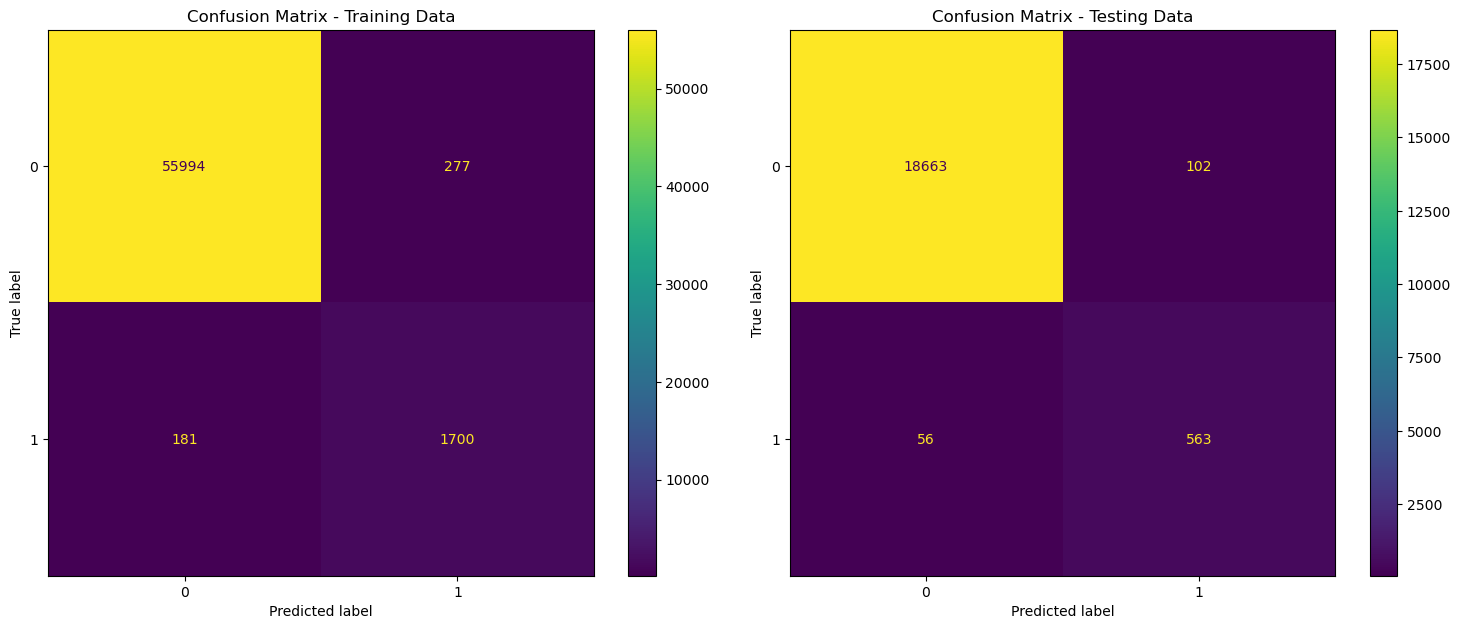

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrices for training and testing datasets
conf_matrix_train = confusion_matrix(y_train, logistic_regression_model.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, y_pred)

# Create ConfusionMatrixDisplay objects
cm_display_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=logistic_regression_model.classes_)
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=logistic_regression_model.classes_)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot confusion matrix for training dataset
cm_display_train.plot(ax=axes[0])
axes[0].set_title("Confusion Matrix - Training Data")

# Plot confusion matrix for testing dataset
cm_display_test.plot(ax=axes[1])
axes[1].set_title("Confusion Matrix - Testing Data")

plt.tight_layout()
plt.show()

In [27]:
# Print the classification report for the model
from sklearn.metrics import classification_report

class_report_train = classification_report(y_train, logistic_regression_model.predict(X_train))
print("Classification Training Report:")
print(class_report_train)

Classification Training Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56271
           1       0.86      0.90      0.88      1881

    accuracy                           0.99     58152
   macro avg       0.93      0.95      0.94     58152
weighted avg       0.99      0.99      0.99     58152



In [28]:
class_report_test = classification_report(y_test, y_pred)
print("Classification Report - Testing Data:")
print(class_report_test)

Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 
The logistic regression model effectively predicts both healthy and high-risk loans. It demonstrates high precision and recall for each loan type, accurately identifying instances while capturing most actual occurrences. This balanced performance ensures effective differentiation between healthy and high-risk loans. Overall, the model achieves strong precision, recall, and balanced F1-scores for both classes, affirming its predictive capabilities.

---